<a href="https://colab.research.google.com/github/OxanaMakhneva/DS/blob/master/GridSearch_about.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression

import matplotlib.pyplot as plt

## Формируем ДФ с данными
- X - столбец с признаком
- y_true - столбец с целевой переменной

In [ ]:
X_values = [3.3, 5.5, 7.2, 9.1, 12, 12.5, 15.6, 17, 21, 23]
y_true_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

data = pd.DataFrame({'X': X_values, 'y_true': y_true_values})
true_for_X = {X_values[idx]: y_true_values[idx] for idx in range(len(X_values))}

In [ ]:
print(true_for_X)

{3.3: 1, 5.5: 2, 7.2: 3, 9.1: 4, 12: 5, 12.5: 6, 15.6: 7, 17: 8, 21: 9, 23: 10}


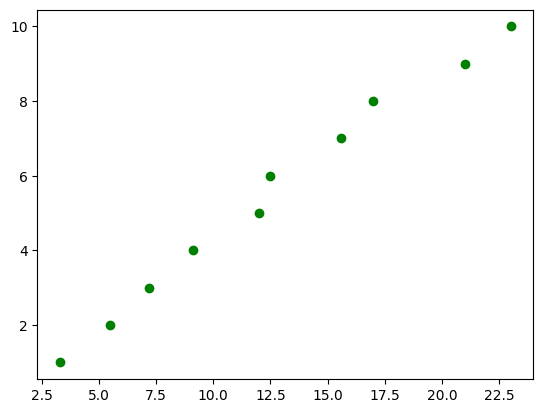

In [ ]:
plt.plot(data.X, data.y_true, 'go');

In [ ]:
el = ElasticNet()

In [ ]:
el.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [ ]:
class My_model(ElasticNet):
  def __init__(self, positions, alpha = 1.0, copy_X = True, fit_intercept = True, l1_ratio = 0.5,\
               max_iter = 1000, positive = False, precompute = False,\
               random_state = None, selection = 'cyclic', tol = 0.0001, warm_start = False):
    super().__init__()
    self.alpha = alpha
    self.copy_X = copy_X
    self.fit_intercept = fit_intercept
    self.l1_ratio = l1_ratio
    self.max_iter = max_iter
    self.positive = positive
    self.precompute = precompute
    self.random_state = random_state
    self.selection = selection
    self.tol = tol
    self.warm_start = warm_start

    self.EN = ElasticNet()
    self.positions = positions
    print(f"Create new obj ")

  def fit(self, X, y_true):
    model_params = self.get_params()
    del model_params['positions']
    self.EN.set_params(**model_params)

    print(f'Start fiting. \n \
          Use features {list(X.values)} \n\
           Use target {list(y_true.values)},\n\
           Use params {self.get_params()}')

    self.X = X
    self.y_true = y_true.values
    self.EN.fit(self.X, self.y_true)

  def predict(self, X):
    model_params = self.get_params()
    del model_params['positions']
    self.EN.set_params(**model_params)
    y_pred = self.EN.predict(X)
    y_true = [self.positions[x] for x in list(X.iloc[:,0])]

    print(f'Start predicting. \n \
             Use features {list(X.values)}, \n\
              Results: \n\
              prom_score: {r2_score(y_true, y_pred)}, \n\
              y_predict: {y_pred} \n ')
    return y_pred

In [ ]:
my_model = My_model(positions = true_for_X)

Create new obj 


In [ ]:
params = {'max_iter': [100, 200],
          'l1_ratio': [0.2, 0.5]}

GS_my = GridSearchCV(estimator = my_model, \
                  param_grid = params,
                  scoring='r2',
                  cv=3,
                  verbose=1)

GS_my.fit(data[['X']], data.y_true)

Create new obj 
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Create new obj 
Start fiting. 
           Use features [array([12.]), array([12.5]), array([15.6]), array([17.]), array([21.]), array([23.])] 
           Use target [5, 6, 7, 8, 9, 10],
           Use params {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.2, 'max_iter': 100, 'positions': {3.3: 1, 5.5: 2, 7.2: 3, 9.1: 4, 12: 5, 12.5: 6, 15.6: 7, 17: 8, 21: 9, 23: 10}, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
Start predicting. 
              Use features [array([3.3]), array([5.5]), array([7.2]), array([9.1])], 
              Results: 
              prom_score: 0.19926296445932967, 
              y_predict: [2.31480144 3.1566787  3.80722022 4.53429603] 
 
Create new obj 
Start fiting. 
           Use features [array([3.3]), array([5.5]), array([7.2]), array([9.1]), array([17.]), array([21.]), array([23.])] 
       

GridSearchCV(cv=3,
             estimator=My_model(positions={3.3: 1, 5.5: 2, 7.2: 3, 9.1: 4,
                                           12: 5, 12.5: 6, 15.6: 7, 17: 8,
                                           21: 9, 23: 10}),
             param_grid={'l1_ratio': [0.2, 0.5, 0.9], 'max_iter': [100, 200]},
             scoring='r2', verbose=1)

In [ ]:
print("Best estimator:", GS_my.best_estimator_)

Best estimator: My_model(l1_ratio=0.2, max_iter=100,
         positions={3.3: 1, 5.5: 2, 7.2: 3, 9.1: 4, 12: 5, 12.5: 6, 15.6: 7,
                    17: 8, 21: 9, 23: 10})


In [ ]:
print("Best score:", GS_my.best_score_)

Best score: 0.6087097997159495


In [ ]:
print("Mean training score for model with best params (best.score in sclearn)):", GS_my.best_score_)
data['pred_my'] = GS_my.best_estimator_.predict(data[['X']])

Mean training score for model with best params (best.score in sclearn)): 0.6087097997159495
Start predicting. 
              Use features [array([3.3]), array([5.5]), array([7.2]), array([9.1]), array([12.]), array([12.5]), array([15.6]), array([17.]), array([21.]), array([23.])], 
              Results: 
              prom_score: 0.9886249922630145, 
              y_predict: [ 1.28185326  2.27755314  3.04695758  3.9068802   5.21939367  5.4456891
  6.84872074  7.48234793  9.29271134 10.19789304] 
 


In [ ]:
df = pd.DataFrame(GS_my.cv_results_)

In [ ]:
df = df.drop(['mean_fit_time', 	'std_fit_time', 	'mean_score_time', 	'std_score_time'], axis = 1)

In [ ]:
df

,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.2,0.2,"{'alpha': 0.2, 'l1_ratio': 0.2}",0.560838,0.772995,0.468760,0.600864,0.127388,4
1,0.2,0.5,"{'alpha': 0.2, 'l1_ratio': 0.5}",0.533366,0.772472,0.498743,0.601527,0.121700,2
2,0.2,0.9,"{'alpha': 0.2, 'l1_ratio': 0.9}",0.495079,0.771767,0.536888,0.601245,0.121779,3
3,0.5,0.2,"{'alpha': 0.5, 'l1_ratio': 0.2}",0.435031,0.770250,0.620848,0.608710,0.137121,1
4,0.5,0.5,"{'alpha': 0.5, 'l1_ratio': 0.5}",0.354905,0.768878,0.674108,0.599297,0.177089,5
5,0.5,0.9,"{'alpha': 0.5, 'l1_ratio': 0.9}",0.237114,0.766997,0.732424,0.578845,0.242052,6
6,1,0.2,"{'alpha': 1, 'l1_ratio': 0.2}",0.199263,0.765492,0.771286,0.578680,0.268299,7
7,1,0.5,"{'alpha': 1, 'l1_ratio': 0.5}",0.001535,0.762536,0.805411,0.523161,0.369260,8
8,1,0.9,"{'alpha': 1, 'l1_ratio': 0.9}",-0.309852,0.758379,0.791898,0.413475,0.511653,9


In [ ]:
(0.9110367734023176 + 0.8104332377094574 + 0.8287463802543262)/3

0.850072130455367

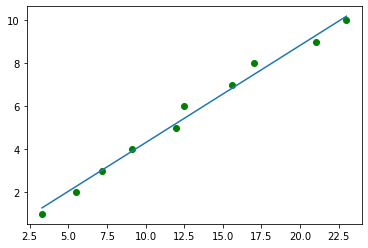

In [ ]:
plt.plot(data.X, data.y_true, 'go')
plt.plot(data.X, data.pred_my, '-');

## Подбор гиперпараментов на большом ДатаФрейме (далее - ДФ)

### Изучение данных

In [ ]:
#Небольшая выборка из данных
data.sample(n = 10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
107017,70241,1.173508,0.501621,-0.523316,1.123965,0.346570,-0.299239,0.015656,0.152270,-0.089320,...,-0.028419,-0.086821,-0.127892,-0.485459,0.577838,-0.289414,0.037012,0.037141,1.00,0.0
94628,64961,-0.284883,0.855885,-0.302967,-1.114846,2.542023,3.270199,0.119630,0.934555,-0.504170,...,-0.319053,-1.006106,-0.050211,0.935555,-0.006594,0.088053,0.247229,0.091073,2.69,0.0
58866,48587,1.419502,-1.149354,0.783665,-1.485047,-1.559352,-0.019778,-1.405691,0.128235,-1.896826,...,0.034016,0.527430,0.002188,0.030039,0.270784,-0.071397,0.064305,0.012697,10.00,0.0
75912,56305,1.293149,0.278428,0.063205,0.575584,-0.185219,-0.785639,0.018377,-0.121592,0.196904,...,-0.332513,-0.998014,0.072860,-0.216150,0.259237,0.130546,-0.029323,0.023596,1.98,0.0
103436,68655,-0.860337,1.283471,0.822532,0.116591,-0.480279,-1.005285,0.379983,0.361300,-0.333443,...,-0.222292,-0.786467,0.125451,0.296769,-0.168627,0.067898,-0.004866,0.018821,32.00,0.0
60535,49370,-0.521355,0.756392,1.277952,1.142962,0.300483,0.522915,0.427733,0.352740,-0.330178,...,-0.002044,0.205594,-0.127005,-0.323212,-0.110544,-0.216828,0.406850,0.191029,28.82,0.0
103207,68546,1.306013,0.182200,-1.463537,0.058926,2.413263,3.218614,-0.196005,0.717948,-0.330764,...,-0.083232,-0.353299,-0.127709,0.998504,0.881116,-0.326947,0.004209,0.010244,4.99,0.0
83117,59696,-0.487209,0.852023,1.619072,-0.077125,-0.305119,-0.707071,0.537733,0.159615,-0.417020,...,-0.175740,-0.584284,0.038661,0.468375,-0.304215,0.046415,0.246625,0.109998,14.99,0.0
77431,57045,-0.833351,0.277164,2.483279,-0.171085,-0.359724,-0.400653,0.109014,0.175998,0.388510,...,0.021352,0.061093,-0.074562,0.393895,-0.109682,0.163366,0.067367,0.117947,28.75,0.0
73847,55304,1.078238,-0.036093,1.317564,1.371287,-1.159945,-0.625836,-0.488032,0.027020,0.514159,...,0.143158,0.339778,0.005616,0.688623,0.265818,-0.383747,0.052454,0.049615,45.00,0.0


In [ ]:
class My_model(ElasticNet):
  def __init__(self, positions, alpha = 1.0, copy_X = True, fit_intercept = True, l1_ratio = 0.5,\
               max_iter = 1000, normalize = 'deprecated', positive = False, precompute = False,\
               random_state = None, selection = 'cyclic', tol = 0.0001, warm_start = False):
    super().__init__()
    self.alpha = alpha
    self.copy_X = copy_X
    self.fit_intercept = fit_intercept
    self.l1_ratio = l1_ratio
    self.max_iter = max_iter
    self.normalize = normalize
    self.positive = positive
    self.precompute = precompute
    self.random_state = random_state
    self.selection = selection
    self.tol = tol
    self.warm_start = warm_start

    self.EN = ElasticNet()
    self.positions = positions
    print(f"Create new obj ")

  def fit(self, X, y_true):
    model_params = self.get_params()
    del model_params['positions']
    self.EN.set_params(**model_params)

    print(f'Start fiting. \n \
          Use features {list(X.values)} \n\
           Use target {list(y_true.values)},\n\
           Use params {self.get_params()}')

    self.X = X
    self.y_true = y_true.values
    self.EN.fit(self.X, self.y_true)

  def predict(self, X):
    model_params = self.get_params()
    del model_params['positions']
    self.EN.set_params(**model_params)
    y_pred = self.EN.predict(X)
    y_true = [self.positions[x] for x in list(X.iloc[:,0])]

    print(f'Start predicting. \n \
             Use features {list(X.values)}, \n\
              Results: \n\
              prom_score: {r2_score(y_true, y_pred)}, \n\
              y_predict: {y_pred} \n ')
    return y_pred